# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [2]:
import pandas as pd

In [3]:
cal_housing=pd.read_csv("cal_housing_clean.csv")

In [4]:
cal_housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
cal_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
x=cal_housing.drop('medianHouseValue',axis=1)
y=cal_housing['medianHouseValue']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.7)

C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
x.shape

(20640, 6)

In [10]:
x_train.shape

(14447, 6)

### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
x_train_df=pd.DataFrame(data=scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test_df=pd.DataFrame(data=scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [14]:
import tensorflow as tf  

In [15]:
x.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [16]:
housingMedianAge=tf.feature_column.numeric_column("housingMedianAge")
totalRooms=tf.feature_column.numeric_column("totalRooms")
totalBedrooms=tf.feature_column.numeric_column("totalBedrooms")
population=tf.feature_column.numeric_column("population")
households=tf.feature_column.numeric_column("households")
medianIncome=tf.feature_column.numeric_column("medianIncome")

In [17]:
feat_cols=[housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [18]:
input_function=tf.estimator.inputs.pandas_input_fn(x=x_train_df,y=y_train,shuffle=True,batch_size=100,num_epochs=2000)

In [19]:
input_function_eval=tf.estimator.inputs.pandas_input_fn(x=x_test_df,shuffle=False,batch_size=10,num_epochs=1)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [42]:
model=tf.estimator.DNNRegressor(hidden_units=[60,60,60,30,30],feature_columns=feat_cols,model_dir="model_California_Housing_Regression")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_master': '', '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025A5EFD80F0>, '_tf_random_seed': None, '_task_id': 0, '_session_config': None, '_is_chief': True, '_evaluation_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_device_fn': None, '_model_dir': 'model_California_Housing_Regression', '_service': None, '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_save_summary_steps': 100}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [43]:
model.train(input_fn=input_function,steps=90000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into model_California_Housing_Regression\model.ckpt.
INFO:tensorflow:loss = 4.91554e+12, step = 0
INFO:tensorflow:global_step/sec: 230.5
INFO:tensorflow:loss = 8.8315e+11, step = 100 (0.435 sec)
INFO:tensorflow:global_step/sec: 261.13
INFO:tensorflow:loss = 6.1653e+11, step = 200 (0.384 sec)
INFO:tensorflow:global_step/sec: 256.419
INFO:tensorflow:loss = 5.1905e+11, step = 300 (0.390 sec)
INFO:tensorflow:global_step/sec: 236.882
INFO:tensorflow:loss = 5.06651e+11, step = 400 (0.422 sec)
INFO:tensorflow:global_step/sec: 259.758
INFO:tensorflow:loss = 5.33511e+11, step = 500 (0.384 sec)
INFO:tensorflow:global_step/sec: 263.884
INFO:tensorflow:loss = 5.5691e+11, step = 600 (0.379 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 267.379
INFO:tensorflow:loss = 4.04754e+11, step = 7900 (0.374 sec)
INFO:tensorflow:global_step/sec: 270.241
INFO:tensorflow:loss = 5.85172e+11, step = 8000 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.015
INFO:tensorflow:loss = 5.89229e+11, step = 8100 (0.368 sec)
INFO:tensorflow:global_step/sec: 271.698
INFO:tensorflow:loss = 5.86192e+11, step = 8200 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.122
INFO:tensorflow:loss = 6.47259e+11, step = 8300 (0.373 sec)
INFO:tensorflow:global_step/sec: 273.189
INFO:tensorflow:loss = 5.52143e+11, step = 8400 (0.367 sec)
INFO:tensorflow:global_step/sec: 271.012
INFO:tensorflow:loss = 4.94993e+11, step = 8500 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.813
INFO:tensorflow:loss = 4.36068e+11, step = 8600 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.241
INFO:tensorflow:loss = 4.42688e+11, step = 8700 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.996
INFO:tensorflow:loss = 4.46892e+11, step = 8800 (0

INFO:tensorflow:global_step/sec: 268.815
INFO:tensorflow:loss = 6.3121e+11, step = 16000 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.486
INFO:tensorflow:loss = 6.34681e+11, step = 16100 (0.366 sec)
INFO:tensorflow:global_step/sec: 270.993
INFO:tensorflow:loss = 5.59865e+11, step = 16200 (0.369 sec)
INFO:tensorflow:global_step/sec: 270.992
INFO:tensorflow:loss = 3.88807e+11, step = 16300 (0.369 sec)
INFO:tensorflow:global_step/sec: 268.095
INFO:tensorflow:loss = 5.76433e+11, step = 16400 (0.373 sec)
INFO:tensorflow:global_step/sec: 272.465
INFO:tensorflow:loss = 5.75336e+11, step = 16500 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.076
INFO:tensorflow:loss = 8.72668e+11, step = 16600 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.382
INFO:tensorflow:loss = 4.63914e+11, step = 16700 (0.373 sec)
INFO:tensorflow:global_step/sec: 272.484
INFO:tensorflow:loss = 4.92228e+11, step = 16800 (0.367 sec)
INFO:tensorflow:global_step/sec: 270.972
INFO:tensorflow:loss = 3.65969e+11, step =

INFO:tensorflow:global_step/sec: 271.709
INFO:tensorflow:loss = 6.56451e+11, step = 24100 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.381
INFO:tensorflow:loss = 5.461e+11, step = 24200 (0.374 sec)
INFO:tensorflow:global_step/sec: 272.467
INFO:tensorflow:loss = 6.37457e+11, step = 24300 (0.368 sec)
INFO:tensorflow:global_step/sec: 271.746
INFO:tensorflow:loss = 4.60392e+11, step = 24400 (0.367 sec)
INFO:tensorflow:global_step/sec: 270.971
INFO:tensorflow:loss = 5.71925e+11, step = 24500 (0.369 sec)
INFO:tensorflow:global_step/sec: 271.016
INFO:tensorflow:loss = 6.10526e+11, step = 24600 (0.369 sec)
INFO:tensorflow:global_step/sec: 272.465
INFO:tensorflow:loss = 4.15813e+11, step = 24700 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.094
INFO:tensorflow:loss = 3.09758e+11, step = 24800 (0.373 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 4.32911e+11, step = 24900 (0.368 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 3.38594e+11, step = 

INFO:tensorflow:global_step/sec: 276.983
INFO:tensorflow:loss = 6.07136e+11, step = 32200 (0.361 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 5.05658e+11, step = 32300 (0.368 sec)
INFO:tensorflow:global_step/sec: 279.273
INFO:tensorflow:loss = 3.78529e+11, step = 32400 (0.359 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 5.18947e+11, step = 32500 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.092
INFO:tensorflow:loss = 4.26855e+11, step = 32600 (0.374 sec)
INFO:tensorflow:global_step/sec: 272.489
INFO:tensorflow:loss = 3.52531e+11, step = 32700 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 8.09861e+11, step = 32800 (0.366 sec)
INFO:tensorflow:global_step/sec: 270.263
INFO:tensorflow:loss = 5.45947e+11, step = 32900 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.973
INFO:tensorflow:loss = 6.59673e+11, step = 33000 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.813
INFO:tensorflow:loss = 4.66755e+11, step 

INFO:tensorflow:global_step/sec: 272.446
INFO:tensorflow:loss = 4.99698e+11, step = 40300 (0.367 sec)
INFO:tensorflow:global_step/sec: 270.266
INFO:tensorflow:loss = 5.31784e+11, step = 40400 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.28
INFO:tensorflow:loss = 4.56584e+11, step = 40500 (0.370 sec)
INFO:tensorflow:global_step/sec: 272.465
INFO:tensorflow:loss = 5.24323e+11, step = 40600 (0.367 sec)
INFO:tensorflow:global_step/sec: 272.465
INFO:tensorflow:loss = 5.28237e+11, step = 40700 (0.367 sec)
INFO:tensorflow:global_step/sec: 272.467
INFO:tensorflow:loss = 6.66149e+11, step = 40800 (0.367 sec)
INFO:tensorflow:global_step/sec: 270.972
INFO:tensorflow:loss = 3.54626e+11, step = 40900 (0.369 sec)
INFO:tensorflow:global_step/sec: 274.725
INFO:tensorflow:loss = 8.01427e+11, step = 41000 (0.364 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 6.89146e+11, step = 41100 (0.366 sec)
INFO:tensorflow:global_step/sec: 268.814
INFO:tensorflow:loss = 4.55506e+11, step =

INFO:tensorflow:global_step/sec: 270.283
INFO:tensorflow:loss = 8.3109e+11, step = 48400 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.794
INFO:tensorflow:loss = 6.33852e+11, step = 48500 (0.372 sec)
INFO:tensorflow:global_step/sec: 273.229
INFO:tensorflow:loss = 4.46023e+11, step = 48600 (0.366 sec)
INFO:tensorflow:global_step/sec: 270.972
INFO:tensorflow:loss = 7.2171e+11, step = 48700 (0.369 sec)
INFO:tensorflow:global_step/sec: 271.012
INFO:tensorflow:loss = 4.21916e+11, step = 48800 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.728
INFO:tensorflow:loss = 4.80102e+11, step = 48900 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.794
INFO:tensorflow:loss = 4.53221e+11, step = 49000 (0.372 sec)
INFO:tensorflow:global_step/sec: 273.229
INFO:tensorflow:loss = 3.94758e+11, step = 49100 (0.366 sec)
INFO:tensorflow:global_step/sec: 275.436
INFO:tensorflow:loss = 7.58569e+11, step = 49200 (0.364 sec)
INFO:tensorflow:global_step/sec: 271.016
INFO:tensorflow:loss = 4.24278e+11, step = 

INFO:tensorflow:global_step/sec: 256.438
INFO:tensorflow:loss = 6.05717e+11, step = 56500 (0.390 sec)
INFO:tensorflow:global_step/sec: 229.972
INFO:tensorflow:loss = 4.43503e+11, step = 56600 (0.435 sec)
INFO:tensorflow:global_step/sec: 263.169
INFO:tensorflow:loss = 5.70602e+11, step = 56700 (0.380 sec)
INFO:tensorflow:global_step/sec: 204.7
INFO:tensorflow:loss = 4.6085e+11, step = 56800 (0.490 sec)
INFO:tensorflow:global_step/sec: 259.089
INFO:tensorflow:loss = 3.30254e+11, step = 56900 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.435
INFO:tensorflow:loss = 5.71053e+11, step = 57000 (0.384 sec)
INFO:tensorflow:global_step/sec: 236.899
INFO:tensorflow:loss = 4.15942e+11, step = 57100 (0.422 sec)
INFO:tensorflow:global_step/sec: 284.85
INFO:tensorflow:loss = 7.72065e+11, step = 57200 (0.351 sec)
INFO:tensorflow:global_step/sec: 225.396
INFO:tensorflow:loss = 6.46331e+11, step = 57300 (0.444 sec)
INFO:tensorflow:global_step/sec: 276.219
INFO:tensorflow:loss = 4.55163e+11, step = 57

INFO:tensorflow:global_step/sec: 265.239
INFO:tensorflow:loss = 4.66077e+11, step = 64600 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.792
INFO:tensorflow:loss = 5.31792e+11, step = 64700 (0.381 sec)
INFO:tensorflow:global_step/sec: 277.006
INFO:tensorflow:loss = 6.09562e+11, step = 64800 (0.361 sec)
INFO:tensorflow:global_step/sec: 275.46
INFO:tensorflow:loss = 4.69141e+11, step = 64900 (0.363 sec)
INFO:tensorflow:global_step/sec: 269.51
INFO:tensorflow:loss = 3.7786e+11, step = 65000 (0.372 sec)
INFO:tensorflow:global_step/sec: 276.224
INFO:tensorflow:loss = 3.06506e+11, step = 65100 (0.362 sec)
INFO:tensorflow:global_step/sec: 275.462
INFO:tensorflow:loss = 3.22497e+11, step = 65200 (0.362 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 5.22395e+11, step = 65300 (0.366 sec)
INFO:tensorflow:global_step/sec: 277.749
INFO:tensorflow:loss = 6.43257e+11, step = 65400 (0.360 sec)
INFO:tensorflow:global_step/sec: 276.993
INFO:tensorflow:loss = 5.05967e+11, step = 6

INFO:tensorflow:global_step/sec: 276.219
INFO:tensorflow:loss = 3.39616e+11, step = 72700 (0.362 sec)
INFO:tensorflow:global_step/sec: 274.718
INFO:tensorflow:loss = 4.0861e+11, step = 72800 (0.364 sec)
INFO:tensorflow:global_step/sec: 275.444
INFO:tensorflow:loss = 5.5555e+11, step = 72900 (0.363 sec)
INFO:tensorflow:global_step/sec: 278.521
INFO:tensorflow:loss = 3.37582e+11, step = 73000 (0.360 sec)
INFO:tensorflow:global_step/sec: 272.488
INFO:tensorflow:loss = 6.65394e+11, step = 73100 (0.366 sec)
INFO:tensorflow:global_step/sec: 276.197
INFO:tensorflow:loss = 3.61263e+11, step = 73200 (0.363 sec)
INFO:tensorflow:global_step/sec: 276.239
INFO:tensorflow:loss = 3.27807e+11, step = 73300 (0.361 sec)
INFO:tensorflow:global_step/sec: 273.189
INFO:tensorflow:loss = 2.97203e+11, step = 73400 (0.366 sec)
INFO:tensorflow:global_step/sec: 275.48
INFO:tensorflow:loss = 3.52933e+11, step = 73500 (0.363 sec)
INFO:tensorflow:global_step/sec: 278.521
INFO:tensorflow:loss = 3.59502e+11, step = 7

INFO:tensorflow:global_step/sec: 255.129
INFO:tensorflow:loss = 4.41176e+11, step = 80800 (0.392 sec)
INFO:tensorflow:global_step/sec: 263.154
INFO:tensorflow:loss = 3.75103e+11, step = 80900 (0.381 sec)
INFO:tensorflow:global_step/sec: 259.107
INFO:tensorflow:loss = 4.42736e+11, step = 81000 (0.386 sec)
INFO:tensorflow:global_step/sec: 257.759
INFO:tensorflow:loss = 3.68154e+11, step = 81100 (0.387 sec)
INFO:tensorflow:global_step/sec: 247.573
INFO:tensorflow:loss = 5.17777e+11, step = 81200 (0.404 sec)
INFO:tensorflow:global_step/sec: 261.773
INFO:tensorflow:loss = 4.07606e+11, step = 81300 (0.382 sec)
INFO:tensorflow:global_step/sec: 241.188
INFO:tensorflow:loss = 3.46985e+11, step = 81400 (0.416 sec)
INFO:tensorflow:global_step/sec: 252.573
INFO:tensorflow:loss = 4.97245e+11, step = 81500 (0.395 sec)
INFO:tensorflow:global_step/sec: 246.357
INFO:tensorflow:loss = 4.91494e+11, step = 81600 (0.407 sec)
INFO:tensorflow:global_step/sec: 265.257
INFO:tensorflow:loss = 5.4481e+11, step =

INFO:tensorflow:global_step/sec: 245.912
INFO:tensorflow:loss = 4.19324e+11, step = 88900 (0.407 sec)
INFO:tensorflow:global_step/sec: 255.134
INFO:tensorflow:loss = 6.40381e+11, step = 89000 (0.392 sec)
INFO:tensorflow:global_step/sec: 259.761
INFO:tensorflow:loss = 4.59198e+11, step = 89100 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.53
INFO:tensorflow:loss = 2.80919e+11, step = 89200 (0.390 sec)
INFO:tensorflow:global_step/sec: 259.196
INFO:tensorflow:loss = 6.4176e+11, step = 89300 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.784
INFO:tensorflow:loss = 4.64972e+11, step = 89400 (0.391 sec)
INFO:tensorflow:global_step/sec: 258.421
INFO:tensorflow:loss = 3.97905e+11, step = 89500 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.943
INFO:tensorflow:loss = 3.78149e+11, step = 89600 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.926
INFO:tensorflow:loss = 5.44983e+11, step = 89700 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.486
INFO:tensorflow:loss = 4.55526e+11, step = 

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [44]:
y_pred=[]
for i in list(model.predict(input_fn=input_function_eval)):
    y_pred.append(i["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_California_Housing_Regression\model.ckpt-90000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [45]:
import sklearn

In [46]:
print(sklearn.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)**0.5)

64775.7055259


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  413.,  1086.,  1247.,  1073.,   784.,   510.,   382.,   196.,
          135.,   367.]),
 array([  22500. ,   70250.1,  118000.2,  165750.3,  213500.4,  261250.5,
         309000.6,  356750.7,  404500.8,  452250.9,  500001. ]),
 <a list of 10 Patch objects>)

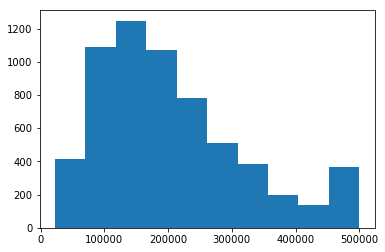

In [48]:
plt.hist(y_test,bins=10)


In [49]:
import numpy as np 

In [50]:
#plt.hist(y_pred[0:1000],bins=20)

In [51]:
y_pred

[array([ 237719.359375], dtype=float32),
 array([ 98133.2578125], dtype=float32),
 array([ 317862.75], dtype=float32),
 array([ 393678.78125], dtype=float32),
 array([ 129390.984375], dtype=float32),
 array([ 99919.2578125], dtype=float32),
 array([ 149739.75], dtype=float32),
 array([ 283062.1875], dtype=float32),
 array([ 139292.359375], dtype=float32),
 array([ 150980.84375], dtype=float32),
 array([ 85399.6171875], dtype=float32),
 array([ 162248.171875], dtype=float32),
 array([ 260067.3125], dtype=float32),
 array([ 223426.46875], dtype=float32),
 array([ 119599.2265625], dtype=float32),
 array([ 99413.6171875], dtype=float32),
 array([ 102086.796875], dtype=float32),
 array([ 359405.28125], dtype=float32),
 array([ 211949.171875], dtype=float32),
 array([ 109532.546875], dtype=float32),
 array([ 194577.34375], dtype=float32),
 array([ 515346.15625], dtype=float32),
 array([ 241653.671875], dtype=float32),
 array([ 69346.3359375], dtype=float32),
 array([ 102247.7734375], dtype=f

(array([  203.,  1616.,  1832.,  1051.,   648.,   377.,   196.,   205.,
           60.,     5.]),
 array([  32130.66992188,   88704.55917969,  145278.4484375 ,
         201852.33769531,  258426.22695313,  315000.11621094,
         371574.00546875,  428147.89472656,  484721.78398438,
         541295.67324219,  597869.5625    ]),
 <a list of 10 Patch objects>)

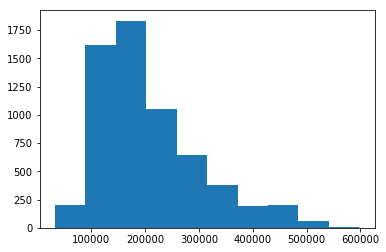

In [52]:
pred_list=[]
for i in y_pred:
    pred_list.append(i[0])
plt.hist(pred_list,bins=10)